In [1]:
#Este dataset fue obtenido de:
#https://www.kaggle.com/sudalairajkumar/daily-temperature-of-major-cities

In [2]:
import os
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.ndimage import gaussian_filter1d
from scipy.signal import medfilt
from pylab import rcParams
from matplotlib import rc
from numpy import array

In [3]:
#Líneas para trabajar con un tarjeta GPU (Nvidia) configurada (CUDA+cudnn) 

#gpu_devices = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(gpu_devices[0], True)

#gpus = tf.test.gpu_device_name()
#print("GPUs: " + gpus)

In [4]:
#Importamos los datos de Kaggle API
#os.system("kaggle datasets download -d sudalairajkumar/daily-temperature-of-major-cities -p $PWD")   

In [5]:
#Descomprimimos el archivo
#os.system("archive.zip")

In [3]:
df0 = pd.read_csv('city_temperature.csv', skiprows=0, sep=',')

C:\Users\olmos\anaconda\envs\hello-tf\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df0.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [5]:
df0['Country'].unique()

array(['Algeria', 'Burundi', 'Benin', 'Central African Republic', 'Congo',
       'Egypt', 'Ethiopia', 'Gabon', 'Gambia', 'Guinea', 'Guinea-Bissau',
       'Ivory Coast', 'Kenya', 'Morocco', 'Madagascar', 'Mauritania',
       'Malawi', 'Mozambique', 'Namibia', 'Nigeria', 'Senegal',
       'Sierra Leone', 'South Africa', 'Togo', 'Tunisia', 'Tanzania',
       'Uganda', 'Zambia', 'Bangladesh', 'China', 'Hong Kong', 'India',
       'Indonesia', 'Japan', 'Kazakhstan', 'Kyrgyzstan', 'Laos',
       'Malaysia', 'Mongolia', 'Myanmar (Burma)', 'Nepal', 'North Korea',
       'Pakistan', 'Philippines', 'Singapore', 'South Korea', 'Sri Lanka',
       'Taiwan', 'Tajikistan', 'Thailand', 'Turkmenistan', 'Uzbekistan',
       'Vietnam', 'Australia', 'New Zealand', 'Albania', 'Austria',
       'Belarus', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany',
       'Georgia', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy',
       'Latvia', 'Ma

In [6]:
df0[df0['Country']=='Argentina']['City'].unique()

array(['Buenos Aires'], dtype=object)

In [7]:
df1 = df0[df0['City']=='Buenos Aires']
df1 = df1.reset_index(drop=True)
df1.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,South/Central America & Carribean,Argentina,NaN,Buenos Aires,1,1,1995,82.4
1,South/Central America & Carribean,Argentina,NaN,Buenos Aires,1,2,1995,75.1
2,South/Central America & Carribean,Argentina,NaN,Buenos Aires,1,3,1995,73.7
3,South/Central America & Carribean,Argentina,NaN,Buenos Aires,1,4,1995,77.1
4,South/Central America & Carribean,Argentina,NaN,Buenos Aires,1,5,1995,79.5


In [8]:
df1.tail()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
9261,South/Central America & Carribean,Argentina,NaN,Buenos Aires,5,9,2020,61.3
9262,South/Central America & Carribean,Argentina,NaN,Buenos Aires,5,10,2020,67.0
9263,South/Central America & Carribean,Argentina,NaN,Buenos Aires,5,11,2020,62.4
9264,South/Central America & Carribean,Argentina,NaN,Buenos Aires,5,12,2020,52.2
9265,South/Central America & Carribean,Argentina,NaN,Buenos Aires,5,13,2020,46.5


In [9]:
df1=df1.drop(['Region','Country','State','City'],1)
df1.head()

,Month,Day,Year,AvgTemperature
0,1,1,1995,82.4
1,1,2,1995,75.1
2,1,3,1995,73.7
3,1,4,1995,77.1
4,1,5,1995,79.5


In [10]:
df1.dtypes

Month               int64
Day                 int64
Year                int64
AvgTemperature    float64
dtype: object

In [11]:
df1['Date']=pd.to_datetime(df1[["Year", "Month", "Day"]])
df1=df1.drop(["Year", "Month", "Day"],1)
df1.head()

,AvgTemperature,Date
0,82.4,1995-01-01
1,75.1,1995-01-02
2,73.7,1995-01-03
3,77.1,1995-01-04
4,79.5,1995-01-05


In [12]:
df1.dtypes

AvgTemperature           float64
Date              datetime64[ns]
dtype: object

In [13]:
df1['AvgTempC'] = df1.apply(lambda x: (x['AvgTemperature']-32)*(5/9) ,axis=1)
df1['AvgTempC']=df1['AvgTempC'].round(2)
df1=df1.drop(['AvgTemperature'],1)
df1.head()

,Date,AvgTempC
0,1995-01-01,28.00
1,1995-01-02,23.94
2,1995-01-03,23.17
3,1995-01-04,25.06
4,1995-01-05,26.39


Text(0, 0.5, 'Temperatura promedio (°C)')

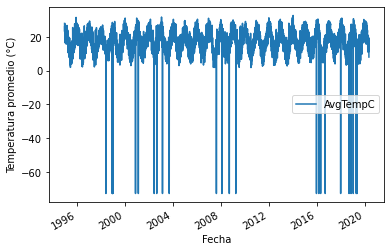

In [14]:
ax = df1.plot(x='Date', y='AvgTempC');
ax.set_xlabel("Fecha")
ax.set_ylabel("Temperatura promedio (°C)")


Text(0, 0.5, 'Temperatura promedio (°C)')

<Figure size 864x648 with 0 Axes>

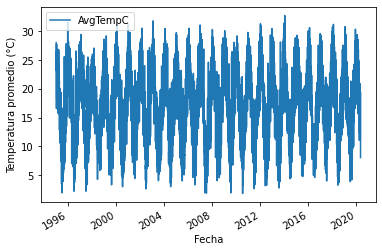

In [15]:
df1 = df1[df1['AvgTempC']>-20.00]
plt.figure(figsize=(12,9))

ax = df1.plot(x='Date', y='AvgTempC');
ax.set_xlabel("Fecha")
ax.set_ylabel("Temperatura promedio (°C)")

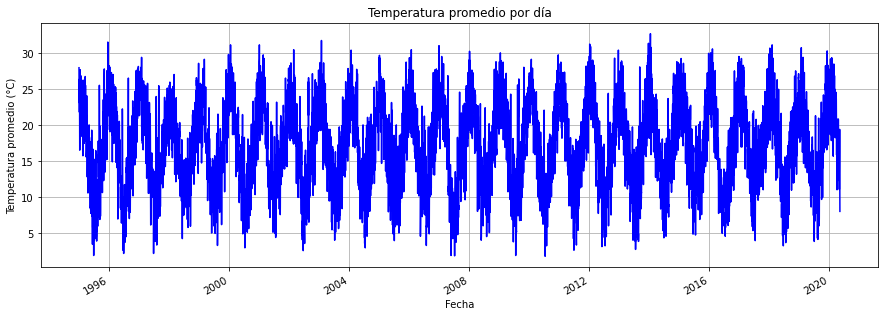

In [16]:
plt.figure(figsize=(15,5))
plt.plot_date(x=df1["Date"], y=df1['AvgTempC'], fmt="b-")
plt.gcf().autofmt_xdate()
plt.xlabel('Fecha')
plt.ylabel('Temperatura promedio (°C)')
plt.title('Temperatura promedio por día')
plt.grid(True)
plt.savefig('datos.png')
plt.show()

In [17]:
df1.count()

Date        9231
AvgTempC    9231
dtype: int64

In [18]:
#Parámetros para el modelo base
n_timestamp = 10
train_days = 7385
testing_days = 1846
n_epochs = 60
n_batch_size = 32 
n_optimizer = 'adam'
n_loss = 'mean_squared_error'

In [19]:
train_set = df1[0:train_days].reset_index(drop=True)
test_set = df1[train_days:train_days + testing_days].reset_index(drop=True)

In [20]:
training_set = train_set.iloc[:,1:2].values
testing_set = test_set.iloc[:,1:2].values

In [21]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
testing_set_scaled = sc.fit_transform(testing_set)

In [22]:
def data_split(sequence, n_timestamp):
    x = []
    y = []
    for i in range(len(sequence)):
        end_ix = i + n_timestamp
        if end_ix > len(sequence)-1:
            break
        # i to end_ix as input
        # end_ix as target output
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        x.append(seq_x)
        y.append(seq_y)
    return array(x), array(y)

In [23]:
x_train, y_train = data_split(training_set_scaled, n_timestamp)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test, y_test = data_split(testing_set_scaled, n_timestamp)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

x_train.shape

(7375, 10, 1)

In [27]:
 # Modelo base: Single cell LSTM
model = Sequential()
model.add(LSTM(50, activation='relu',input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(1))    
    
model.compile(optimizer = n_optimizer, loss = n_loss)
history = model.fit(x_train, y_train, epochs = n_epochs, batch_size = n_batch_size, validation_split = 0.1)
loss = history.history['loss']
epochs = range(len(loss))

model.save("model_base.h5")

Epoch 1/60
208/208 [==============================] - 10s 24ms/step - loss: 0.0869 - val_loss: 0.0139
Epoch 2/60
208/208 [==============================] - 3s 15ms/step - loss: 0.0162 - val_loss: 0.0127
Epoch 3/60
208/208 [==============================] - 3s 15ms/step - loss: 0.0146 - val_loss: 0.0120
Epoch 4/60
208/208 [==============================] - 3s 16ms/step - loss: 0.0137 - val_loss: 0.0108
Epoch 5/60
208/208 [==============================] - 3s 17ms/step - loss: 0.0129 - val_loss: 0.0100
Epoch 6/60
208/208 [==============================] - 5s 23ms/step - loss: 0.0116 - val_loss: 0.0089
Epoch 7/60
208/208 [==============================] - 7s 32ms/step - loss: 0.0118 - val_loss: 0.0091
Epoch 8/60
208/208 [==============================] - 5s 24ms/step - loss: 0.0113 - val_loss: 0.0085
Epoch 9/60
208/208 [==============================] - 5s 24ms/step - loss: 0.0106 - val_loss: 0.0088
Epoch 10/60
208/208 [==============================] - 4s 18ms/step - loss: 0.0102 - val_l

In [24]:
# Obtenemos la predicción
model = tf.keras.models.load_model("model_base.h5")
y_predicted = model.predict(x_test)

# 'Desnormalizamos' los datos
y_predicted_descaled_b = sc.inverse_transform(y_predicted)
y_train_descaled = sc.inverse_transform(y_train)
y_test_descaled_b = sc.inverse_transform(y_test)
y_pred = y_predicted.ravel()
y_pred = [round(yx, 2) for yx in y_pred]
y_tested = y_test.ravel()

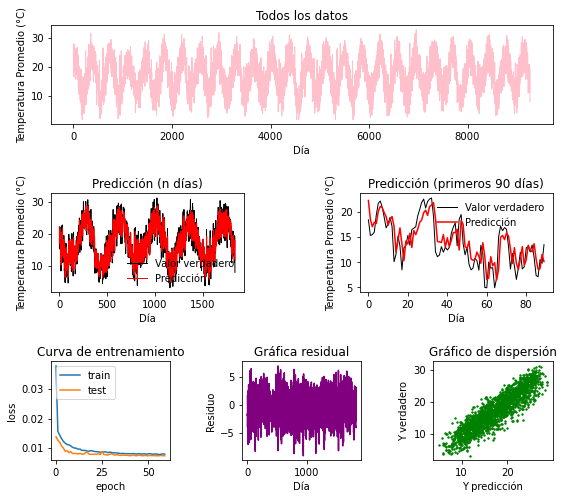

mse=6.48
r2=0.81


<Figure size 432x288 with 0 Axes>

In [29]:
# Mostramos los resultados
plt.figure(figsize=(9,8))

plt.subplot(3, 1, 1)
plt.plot(df1['AvgTempC'], color = 'pink', linewidth=1, label = 'Valor verdadero')
plt.ylabel("Temperatura Promedio (°C)")
plt.xlabel("Día")
plt.title("Todos los datos")


plt.subplot(3, 2, 3)
plt.plot(y_test_descaled_b, color = 'black', linewidth=1, label = 'Valor verdadero')
plt.plot(y_predicted_descaled_b, color = 'red',  linewidth=1, label = 'Predicción')
plt.legend(frameon=False)
plt.ylabel("Temperatura Promedio (°C)")
plt.xlabel("Día")
plt.title("Predicción (n días)")

plt.subplot(3, 2, 4)
plt.plot(y_test_descaled_b[0:90], color = 'black', linewidth=1, label = 'Valor verdadero')
plt.plot(y_predicted_descaled_b[0:90], color = 'red', label = 'Predicción')
plt.legend(frameon=False)
plt.ylabel("Temperatura Promedio (°C)")
plt.xlabel("Día")
plt.title("Predicción (primeros 90 días)")

plt.subplot(3, 3, 7)
#plt.plot(epochs, loss, color='blue')
#plt.ylabel("Loss")
#plt.xlabel("Epoch")
#plt.title("Curva de entrenamiento")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Curva de entrenamiento')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


plt.subplot(3, 3, 8)
plt.plot(y_test_descaled_b-y_predicted_descaled_b, color='purple')
plt.ylabel("Residuo")
plt.xlabel("Día")
plt.title("Gráfica residual")

plt.subplot(3, 3, 9)
plt.scatter(y_predicted_descaled_b, y_test_descaled_b, s=2, color='green')
plt.ylabel("Y verdadero")
plt.xlabel("Y predicción")
plt.title("Gráfico de dispersión")

plt.subplots_adjust(hspace = 0.7, wspace=0.6)
plt.show()
plt.savefig('model_base_subplot.png')



mse = mean_squared_error(y_test_descaled_b, y_predicted_descaled_b)
r2 = r2_score(y_test_descaled_b, y_predicted_descaled_b)
print("mse=" + str(round(mse,2)))
print("r2=" + str(round(r2,2)))

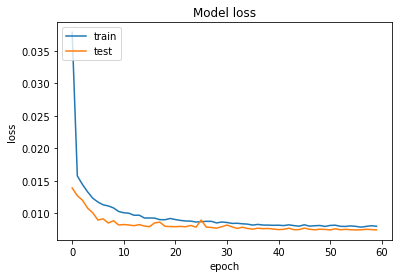

<Figure size 432x288 with 0 Axes>

In [30]:
#Gráfica de entrenamiento 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_base_loss.png')

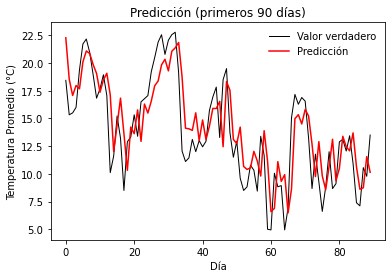

<Figure size 432x288 with 0 Axes>

In [31]:
#Gráfica de predicción
plt.plot(y_test_descaled_b[0:90], color = 'black', linewidth=1, label = 'Valor verdadero')
plt.plot(y_predicted_descaled_b[0:90], color = 'red', label = 'Predicción')
plt.legend(frameon=False)
plt.ylabel("Temperatura Promedio (°C)")
plt.xlabel("Día")
plt.title("Predicción (primeros 90 días)")
plt.show()
plt.savefig('model_base_pred.png')

In [32]:
model.evaluate(x_test, y_test)

58/58 [==============================] - 1s 3ms/step - loss: 0.0083


0.00833064317703247

In [33]:
 ##Corremos las variaciones##  
#Variación 1.1: Stacked LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer = n_optimizer, loss = n_loss)
history = model.fit(x_train, y_train, epochs = n_epochs, batch_size = n_batch_size, validation_split = 0.1)
loss = history.history['loss']
epochs = range(len(loss))

model.save("model_var11.h5")

Epoch 1/60
208/208 [==============================] - 17s 49ms/step - loss: 0.0678 - val_loss: 0.0159
Epoch 2/60
208/208 [==============================] - 8s 40ms/step - loss: 0.0174 - val_loss: 0.0151A: 0s - loss: 0.0 - ETA: 0s - los
Epoch 3/60
208/208 [==============================] - 10s 48ms/step - loss: 0.0163 - val_loss: 0.0139
Epoch 4/60
208/208 [==============================] - 9s 44ms/step - loss: 0.0148 - val_loss: 0.0120 0s - loss: 
Epoch 5/60
208/208 [==============================] - 7s 35ms/step - loss: 0.0134 - val_loss: 0.0105
Epoch 6/60
208/208 [==============================] - 9s 41ms/step - loss: 0.0124 - val_loss: 0.0093
Epoch 7/60
208/208 [==============================] - 5s 24ms/step - loss: 0.0118 - val_loss: 0.0090
Epoch 8/60
208/208 [==============================] - 5s 22ms/step - loss: 0.0112 - val_loss: 0.0099
Epoch 9/60
208/208 [==============================] - 5s 26ms/step - loss: 0.0112 - val_loss: 0.0082
Epoch 10/60
208/208 [=======================

In [25]:
# Obtenemos la predicción
model = tf.keras.models.load_model("model_var11.h5")
y_predicted = model.predict(x_test)

# 'Desnormalizamos' los datos
y_predicted_descaled_v11 = sc.inverse_transform(y_predicted)
y_train_descaled = sc.inverse_transform(y_train)
y_test_descaled_v11 = sc.inverse_transform(y_test)
y_pred = y_predicted.ravel()
y_pred = [round(yx, 2) for yx in y_pred]
y_tested = y_test.ravel()

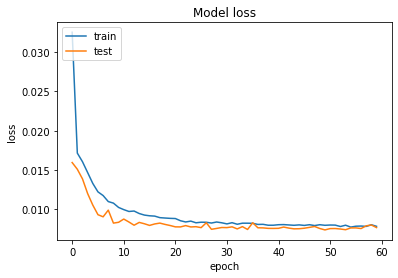

<Figure size 432x288 with 0 Axes>

In [35]:
#Gráfica de entrenamiento 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_var11_loss.png')

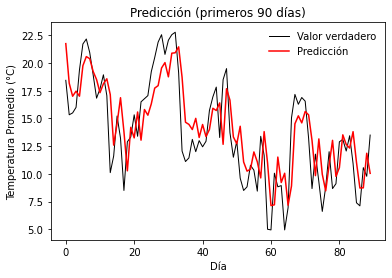

<Figure size 432x288 with 0 Axes>

In [36]:
#Gráfica de predicción
plt.plot(y_test_descaled_v11[0:90], color = 'black', linewidth=1, label = 'Valor verdadero')
plt.plot(y_predicted_descaled_v11[0:90], color = 'red', label = 'Predicción')
plt.legend(frameon=False)
plt.ylabel("Temperatura Promedio (°C)")
plt.xlabel("Día")
plt.title("Predicción (primeros 90 días)")
plt.show()
plt.savefig('model_var11_pred.png')

In [37]:
#Variación 1.2: Bidirectional LSTM
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer = n_optimizer, loss = n_loss)
history = model.fit(x_train, y_train, epochs = n_epochs, batch_size = n_batch_size, validation_split = 0.1)
loss = history.history['loss']
epochs = range(len(loss))

model.save("model_var12.h5")

Epoch 1/60
208/208 [==============================] - 12s 25ms/step - loss: 0.0693 - val_loss: 0.0140
Epoch 2/60
208/208 [==============================] - 4s 21ms/step - loss: 0.0150 - val_loss: 0.0129
Epoch 3/60
208/208 [==============================] - 4s 20ms/step - loss: 0.0137 - val_loss: 0.0122
Epoch 4/60
208/208 [==============================] - 4s 20ms/step - loss: 0.0128 - val_loss: 0.0109
Epoch 5/60
208/208 [==============================] - 4s 20ms/step - loss: 0.0115 - val_loss: 0.0102
Epoch 6/60
208/208 [==============================] - 4s 20ms/step - loss: 0.0112 - val_loss: 0.0096
Epoch 7/60
208/208 [==============================] - 4s 22ms/step - loss: 0.0105 - val_loss: 0.0091
Epoch 8/60
208/208 [==============================] - 4s 21ms/step - loss: 0.0096 - val_loss: 0.0088
Epoch 9/60
208/208 [==============================] - 4s 21ms/step - loss: 0.0094 - val_loss: 0.0097
Epoch 10/60
208/208 [==============================] - 5s 24ms/step - loss: 0.0091 - val_l

In [26]:
# Obtenemos la predicción
model = tf.keras.models.load_model("model_var12.h5")
y_predicted = model.predict(x_test)

# 'Desnormalizamos' los datos
y_predicted_descaled_v12 = sc.inverse_transform(y_predicted)
y_train_descaled = sc.inverse_transform(y_train)
y_test_descaled_v12 = sc.inverse_transform(y_test)
y_pred = y_predicted.ravel()
y_pred = [round(yx, 2) for yx in y_pred]
y_tested = y_test.ravel()

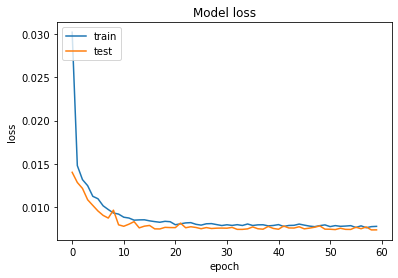

<Figure size 432x288 with 0 Axes>

In [39]:
#Gráfica de entrenamiento 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_var12_loss.png')

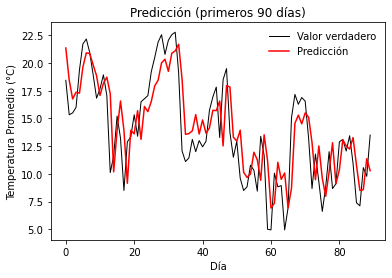

<Figure size 432x288 with 0 Axes>

In [40]:
#Gráfica de predicción
plt.plot(y_test_descaled_v12[0:90], color = 'black', linewidth=1, label = 'Valor verdadero')
plt.plot(y_predicted_descaled_v12[0:90], color = 'red', label = 'Predicción')
plt.legend(frameon=False)
plt.ylabel("Temperatura Promedio (°C)")
plt.xlabel("Día")
plt.title("Predicción (primeros 90 días)")
plt.show()
plt.savefig('model_var12_pred.png')

In [41]:
#Variación 2: Optimizer = SGD

n_optimizer = 'sgd'

model = Sequential()
model.add(LSTM(50, activation='relu',input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(1))  
    
model.compile(optimizer = n_optimizer, loss = n_loss)
history = model.fit(x_train, y_train, epochs = n_epochs, batch_size = n_batch_size, validation_split = 0.1)
loss = history.history['loss']
epochs = range(len(loss))

model.save("model_var2.h5")

Epoch 1/60
208/208 [==============================] - 6s 15ms/step - loss: 0.0703 - val_loss: 0.0227
Epoch 2/60
208/208 [==============================] - 3s 12ms/step - loss: 0.0234 - val_loss: 0.0202
Epoch 3/60
208/208 [==============================] - 2s 12ms/step - loss: 0.0207 - val_loss: 0.0181
Epoch 4/60
208/208 [==============================] - 3s 12ms/step - loss: 0.0193 - val_loss: 0.0164
Epoch 5/60
208/208 [==============================] - 3s 13ms/step - loss: 0.0174 - val_loss: 0.0152
Epoch 6/60
208/208 [==============================] - 3s 12ms/step - loss: 0.0156 - val_loss: 0.0143
Epoch 7/60
208/208 [==============================] - 3s 12ms/step - loss: 0.0147 - val_loss: 0.0136
Epoch 8/60
208/208 [==============================] - 3s 12ms/step - loss: 0.0145 - val_loss: 0.0132
Epoch 9/60
208/208 [==============================] - 3s 12ms/step - loss: 0.0142 - val_loss: 0.0127
Epoch 10/60
208/208 [==============================] - 3s 12ms/step - loss: 0.0132 - val_lo

In [27]:
# Obtenemos la predicción
model = tf.keras.models.load_model("model_var2.h5")
y_predicted = model.predict(x_test)

# 'Desnormalizamos' los datos
y_predicted_descaled_v2 = sc.inverse_transform(y_predicted)
y_train_descaled = sc.inverse_transform(y_train)
y_test_descaled_v2 = sc.inverse_transform(y_test)
y_pred = y_predicted.ravel()
y_pred = [round(yx, 2) for yx in y_pred]
y_tested = y_test.ravel()

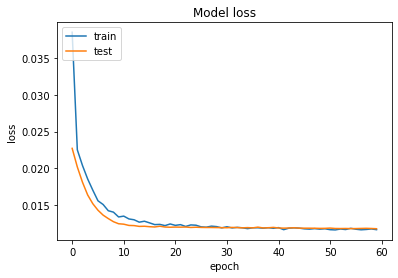

<Figure size 432x288 with 0 Axes>

In [43]:
#Gráfica de entrenamiento 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_var2_loss.png')

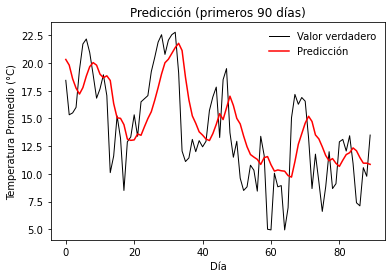

<Figure size 432x288 with 0 Axes>

In [44]:
#Gráfica de predicción
plt.plot(y_test_descaled_v2[0:90], color = 'black', linewidth=1, label = 'Valor verdadero')
plt.plot(y_predicted_descaled_v2[0:90], color = 'red', label = 'Predicción')
plt.legend(frameon=False)
plt.ylabel("Temperatura Promedio (°C)")
plt.xlabel("Día")
plt.title("Predicción (primeros 90 días)")
plt.show()
plt.savefig('model_var2_pred.png')

In [45]:
#Variación 3: Batch_size = 64

n_batch_size = 64

model = Sequential()
model.add(LSTM(50, activation='relu',input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(1))  
    
model.compile(optimizer = n_optimizer, loss = n_loss)
history = model.fit(x_train, y_train, epochs = n_epochs, batch_size = n_batch_size, validation_split = 0.1)
loss = history.history['loss']
epochs = range(len(loss))

model.save("model_var3.h5")

Epoch 1/60
104/104 [==============================] - 5s 19ms/step - loss: 0.1101 - val_loss: 0.0238
Epoch 2/60
104/104 [==============================] - 2s 15ms/step - loss: 0.0245 - val_loss: 0.0217
Epoch 3/60
104/104 [==============================] - 2s 15ms/step - loss: 0.0231 - val_loss: 0.0205
Epoch 4/60
104/104 [==============================] - 2s 19ms/step - loss: 0.0223 - val_loss: 0.0195
Epoch 5/60
104/104 [==============================] - 2s 15ms/step - loss: 0.0202 - val_loss: 0.0185
Epoch 6/60
104/104 [==============================] - 2s 15ms/step - loss: 0.0198 - val_loss: 0.0178
Epoch 7/60
104/104 [==============================] - 2s 15ms/step - loss: 0.0189 - val_loss: 0.0170
Epoch 8/60
104/104 [==============================] - 2s 15ms/step - loss: 0.0182 - val_loss: 0.0163
Epoch 9/60
104/104 [==============================] - 2s 16ms/step - loss: 0.0180 - val_loss: 0.0157
Epoch 10/60
104/104 [==============================] - 2s 16ms/step - loss: 0.0172 - val_lo

In [28]:
# Obtenemos la predicción
model = tf.keras.models.load_model("model_var3.h5")
y_predicted = model.predict(x_test)

# 'Desnormalizamos' los datos
y_predicted_descaled_v3 = sc.inverse_transform(y_predicted)
y_train_descaled = sc.inverse_transform(y_train)
y_test_descaled_v3 = sc.inverse_transform(y_test)
y_pred = y_predicted.ravel()
y_pred = [round(yx, 2) for yx in y_pred]
y_tested = y_test.ravel()

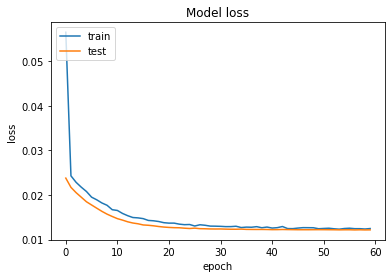

<Figure size 432x288 with 0 Axes>

In [47]:
#Gráfica de entrenamiento 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_var2_loss.png')

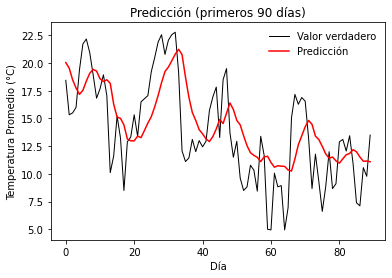

<Figure size 432x288 with 0 Axes>

In [48]:
#Gráfica de predicción
#plt.figure(figsize=(9,8))
plt.plot(y_test_descaled_v3[0:90], color = 'black', linewidth=1, label = 'Valor verdadero')
plt.plot(y_predicted_descaled_v3[0:90], color = 'red', label = 'Predicción')
plt.legend(frameon=False)
plt.ylabel("Temperatura Promedio (°C)")
plt.xlabel("Día")
plt.title("Predicción (primeros 90 días)")
plt.show()
plt.savefig('model_var2_pred.png')

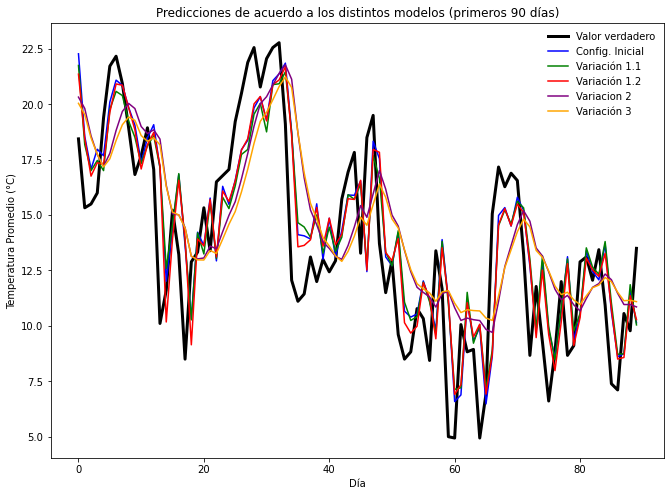

<Figure size 432x288 with 0 Axes>

In [32]:
#Gráfica de predicción para todos los modelos
plt.figure(figsize=(11,8))
plt.plot(y_test_descaled_v3[0:90], color = 'black', linewidth=3, label = 'Valor verdadero')
plt.plot(y_predicted_descaled_b[0:90], color = 'blue', label = 'Config. Inicial')
plt.plot(y_predicted_descaled_v11[0:90], color = 'green', label = 'Variación 1.1')
plt.plot(y_predicted_descaled_v12[0:90], color = 'red', label = 'Variación 1.2')
plt.plot(y_predicted_descaled_v2[0:90], color = 'purple', label = 'Variacion 2')
plt.plot(y_predicted_descaled_v3[0:90], color = 'orange', label = 'Variación 3')
plt.legend(frameon=False)
plt.ylabel("Temperatura Promedio (°C)")
plt.xlabel("Día")
plt.title("Predicciones de acuerdo a los distintos modelos (primeros 90 días)")
plt.show()
plt.savefig('model_var2_pred.png')

In [30]:
mse_iconfig = mean_squared_error(y_test_descaled_b, y_predicted_descaled_b)
mse_v11 = mean_squared_error(y_test_descaled_v11, y_predicted_descaled_v11)
mse_v12 = mean_squared_error(y_test_descaled_v12, y_predicted_descaled_v12)
mse_v2 = mean_squared_error(y_test_descaled_v2, y_predicted_descaled_v2)
mse_v3 = mean_squared_error(y_test_descaled_v3, y_predicted_descaled_v3)
print('mse_iconfig =',mse_iconfig )
print('mse_v11 =',mse_v11)
print('mse_v12  =',mse_v12 )
print('mse_v2 =',mse_v2 )
print('mse_v3 =',mse_v3 )

mse_iconfig = 6.480007977113562
mse_v11 = 6.776206699053905
mse_v12  = 6.546372616938668
mse_v2 = 9.85085962176982
mse_v3 = 10.163026077412981
